In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Problem Statement:**

AeroFit, a prominent fitness equipment brand, is looking to gain insights into the specific customer profiles for each of their treadmill products. They aim to better understand the distinctions in customer characteristics across their treadmill offerings to provide more targeted recommendations to new customers. To achieve this, they plan to conduct a thorough analysis to investigate potential differences among their products concerning customer demographics.

**Objective:**

The objective is to perform descriptive analytics, utilizing tables and charts, to develop customer profiles for each AeroFit treadmill product. This involves creating two-way contingency tables for each product and calculating conditional and marginal probabilities. The insights derived from these analyses will help AeroFit make informed decisions and tailor their marketing strategies to different customer segments for each treadmill product.

**Analysing basic metrics**

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

Dataset has 180 rows and 9 columns.

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

**Inference:**
No Duplicate records found.

In [ ]:
df.isna().sum().sum()

0

**Inference:** No missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The DataFrame contains 180 entries with no missing values. It includes categorical columns like Product, Gender, and MaritalStatus, and numerical columns such as Age, Education, Usage, Fitness, Income, and Miles.Since Product, Gender and MaritalStatus are categorial variables. Hence updating the dtype for same.

In [ ]:
df['Gender'] = df['Gender'].astype("category")
df['Product'] = df['Product'].astype("category")
df['MaritalStatus'] = df['MaritalStatus'].astype("category")

**Analyzing basic statistics about each feature, such as count, min, max, and mean**

In [ ]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Analysis:**

**Data Completeness:**The dataset appears to be complete, with no missing values in any of the columns, indicating good data quality.

**Product Information:**There are three unique products in the dataset, with "KP281" being the most frequently purchased product, suggesting potential popularity or marketing success for that specific product.

**Age Distribution:** The age of individuals in the dataset ranges from 18 to 50, with an average age of approximately 28.79. A significant portion of the individuals (75%) are aged 33 or younger.

**Education Level:** Most individuals in the dataset have 16 years of education, with 75% of individuals having 16 years of education or less.

**Gender Distribution:** The dataset is skewed towards males, with 104 individuals being male and the remaining being female.

**Income and Miles:** Income and Miles traveled exhibit high standard deviations, suggesting potential outliers in these variables. Most customers earn around 58,000
annually, with a wide range from 29,562 to 104,581. The average number of miles
customers walk is 103, with a minimum of 21 and a maximum of 360.

**Usage and Fitness:** On average, customers use the treadmill 3.4 times a week, with a minimum of 2 times and a maximum of 7 times. The average fitness rating is 3.3 on a scale of 1 to 5.

**Income Disparity:** There is a significant income disparity among customers who purchase treadmills, with some earning substantially higher incomes than others. This indicates potential market segmentation opportunities based on income levels.

**Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
# Total number of unique Product ids
df['Product'].nunique()

3

In [ ]:
# unique list of product ids
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [ ]:
# Total number of unique ages
unique_age_count = df['Age'].nunique()
unique_age_count

32

In [ ]:
# list of unique ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
# Number of Male and Female customers
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# list of unique Educations
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [ ]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
# Number of customers with 3 different product types
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
# Number of customers counts on Usage
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

**Inference:**
No abnormalities were found in the data.

**Analysis:**

**Product Variety:** The dataset includes three distinct treadmill products: KP281, KP481, and KP781. Among these, KP281 stands out as the most commonly purchased product, indicating its popularity or effective marketing.

**Diverse Age Range:** The dataset covers a diverse range of customer ages, with 32 unique ages represented. This suggests a broad customer base spanning various age groups.

**Gender Distribution:** The customer list consists of 104 males and 76 females, indicating a somewhat skewed gender distribution towards males.

**Educational Diversity:** Eight unique education levels are observed, ranging from 12 to 21 years. The variety in education levels demonstrates the diversity in customers' educational backgrounds.

**Fitness Ratings:** The highest-rated fitness level among customers is 3, suggesting a moderate level of self-reported fitness.

**Usage Patterns:** Most customers use the treadmill for at least 3 days per week, indicating a regular and consistent usage pattern.

**Marital/Partnership Status:** The majority of customers who have purchased treadmills are married or partnered. This information can be valuable for marketing strategies targeting couples or families.

In [ ]:
# Purpose: This code enhances the original DataFrame by creating a new column "Fitness_Category" to store descriptive fitness categories.
# It then maps integer fitness ratings to human-readable categories to improve data interpretability and analysis.

# Create a copy of the original DataFrame to preserve the original data.
df_with_fitness_categories = df.copy()

# Create a new column "Fitness_Category" for descriptive fitness categories.
df_with_fitness_categories['Fitness_Category'] = df_with_fitness_categories['Fitness']

# Define a mapping for replacing integer fitness ratings with human-readable categories.
fitness_rating_mapping = {
    1: "Poor Shape",
    2: "Below Average",
    3: "Average Shape",
    4: "Good Shape",
    5: "Excellent Shape"
}

# Apply the mapping to the "Fitness_Category" column.
df_with_fitness_categories["Fitness_Category"].replace(fitness_rating_mapping, inplace=True)
df_with_fitness_categories.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below Average


In [ ]:
# Calculate the count of each fitness category
fitness_category_counts = df_with_fitness_categories['Fitness_Category'].value_counts()

# Calculate the average income for each fitness category
average_income_by_fitness = df_with_fitness_categories.groupby('Fitness_Category')['Income'].mean().sort_values(ascending=False)

# Calculate the average age for each fitness category
average_age_by_fitness = df_with_fitness_categories.groupby('Fitness_Category')['Age'].mean().sort_values(ascending=False)

# Display the count of each fitness category
print("Count of Customers in Each Fitness Category:")
print(fitness_category_counts)
print("\n")

print("Average Income by Fitness Category:")
print(average_income_by_fitness)
print("\n")

print("Average Age by Fitness Category:")
print(average_age_by_fitness)

Count of Customers in Each Fitness Category:
Average Shape      97
Excellent Shape    31
Below Average      26
Good Shape         24
Poor Shape          2
Name: Fitness_Category, dtype: int64


Average Income by Fitness Category:
Fitness_Category
Excellent Shape    74396.709677
Good Shape         54995.291667
Poor Shape         51939.000000
Average Shape      48853.494845
Below Average      46179.692308
Name: Income, dtype: float64


Average Age by Fitness Category:
Fitness_Category
Excellent Shape    29.806452
Average Shape      28.752577
Good Shape         28.333333
Below Average      28.269231
Poor Shape         27.000000
Name: Age, dtype: float64


**Analysis:**

**Count of Customers in Each Fitness Category:**

1."Average Shape" has the highest number of customers, with 97 individuals in this category.

2."Excellent Shape" follows with 31 customers.

3."Below Average" and "Good Shape" have 26 and 24 customers, respectively.

4."Poor Shape" has the fewest customers, with only 2 individuals.

**Average Income by Fitness Category:**

1.Customers in "Excellent Shape" have the highest average income, approximately 74,397.
The "Good Shape" category is close behind with an average income of around 54,995.

2.Customers in "Poor Shape" have the lowest average income, approximately 51,939.

3."Average Shape" and "Below Average" categories have average incomes of approximately 48,853 and 46,179, respectively.

**Average Age by Fitness Category:**

1.Customers in "Excellent Shape" have the highest average age, approximately 29.81 years.

2.The "Average Shape" category follows closely with an average age of approximately 28.75 years.

3."Good Shape" and "Below Average" categories have average ages of approximately 28.33 and 28.27 years, respectively.

4.Customers in "Poor Shape" have the lowest average age, approximately 27 years.

In summary, customers in better fitness categories tend to have higher average incomes and slightly higher average ages, while those in poorer fitness categories have lower incomes and tend to be younger on average.

In [ ]:
# Calculate the percentage distribution of unique products in the "Product" column
product_distribution = (df['Product'].value_counts(normalize=True) * 100).round(2)
product_distribution

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

**Analysis:**

**KP281 (44.44%):** The most frequently purchased product among customers is KP281, accounting for nearly 44.44% of the total product distribution. This indicates a strong preference for or popularity of KP281 among treadmill buyers.

**KP481 (33.33%):** KP481 is the second most common product, making up approximately 33.33% of the product distribution. While not as popular as KP281, it still holds a significant share of the market.

**KP781 (22.22%):** KP781 represents approximately 22.22% of the product distribution. While it has the smallest share among the three products, it remains a notable choice for some customers.

In [ ]:
# Calculate and display the percentage distribution of customer gender
gender_distribution = (df['Gender'].value_counts(normalize=True) * 100).round(2)
gender_distribution

Male      57.78
Female    42.22
Name: Gender, dtype: float64

In [ ]:
# Calculate and display the percentage distribution of customer marital status
marital_status_distribution = (df['MaritalStatus'].value_counts(normalize=True) * 100).round(2)
marital_status_distribution

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

In [ ]:
# Calculate and display the percentage distribution of treadmill usage per week
usage_distribution = (df['Usage'].value_counts(normalize=True) * 100).round(2).reset_index().rename(columns={'index':'DaysPerWeek'})
usage_distribution

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


In [ ]:
# Calculate and display the percentage distribution of customer fitness ratings
rating_distribution = (df['Fitness'].value_counts(normalize=True) * 100).round(2).reset_index().rename(columns={'index':'Rating'})
rating_distribution

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


**Analysis:**

**Customer Gender Distribution (%):**

1.Male (57.78%): Approximately 57.78% of customers are male.

2.Female (42.22%): Around 42.22% of customers are female.

**Marital Status Distribution (%):**

1.Partnered (59.44%): The majority, 59.44%, of customers are partnered.

2.Single (40.56%): Approximately 40.56% of customers are single.

**Treadmill Usage Patterns (%):**

1.3 Days per Week (38.33%): The most common usage pattern is three days a week, with approximately 38.33% of customers following this routine.

2.4 Days per Week (28.89%): Nearly 28.89% of customers use the treadmill four days a week, making it the second most popular frequency.

3.2 Days per Week (18.33%): Approximately 18.33% of customers use the treadmill two days a week, representing a significant portion of users.

4.5 Days per Week (9.44%): About 9.44% of customers have a five-day-a-week routine, indicating a commitment to regular exercise.

5.6 Days per Week (3.89%): A smaller percentage, 3.89%, use the treadmill six days a week, demonstrating a higher level of dedication.

6.7 Days per Week (1.11%): The least common frequency is daily usage, with only 1.11% of customers using the treadmill every day.

**Customer Fitness Ratings (%):**

1.Average Shape (53.89%): The majority of customers, approximately 53.89%, rate themselves as being in average shape.

2.Excellent Shape (17.22%): A significant portion, around 17.22%, consider themselves to be in excellent shape.

3.Below Average (14.44%): About 14.44% of customers rate themselves as below average in terms of fitness.

4.Good Shape (13.33%): Approximately 13.33% of customers believe they are in good shape, making it the second most common rating.

5.Poor Shape (1.11%): The lowest percentage, only 1.11%, rate themselves as being in poor shape.


**Visual Analysis - Univariate**

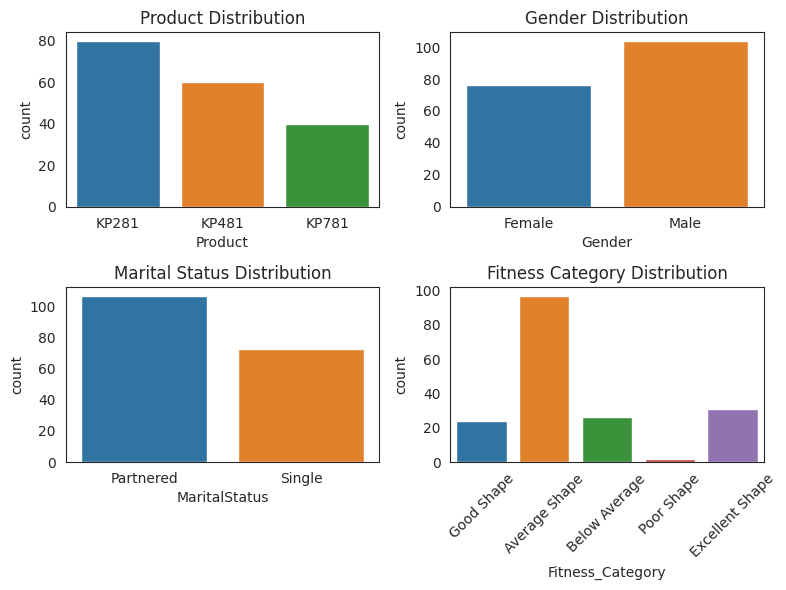

In [ ]:
# Create a figure with 2 rows and 2 columns for subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot the count of products
sns.countplot(data=df, x='Product', ax=axs[0, 0])
axs[0, 0].set_title('Product Distribution')

# Plot the count of genders
sns.countplot(data=df, x='Gender', ax=axs[0, 1])
axs[0, 1].set_title('Gender Distribution')

# Plot the count of marital statuses
sns.countplot(data=df, x='MaritalStatus', ax=axs[1, 0])
axs[1, 0].set_title('Marital Status Distribution')

# Plot the count of fitness categories
sns.countplot(data=df_with_fitness_categories, x='Fitness_Category', ax=axs[1, 1])
axs[1, 1].set_title('Fitness Category Distribution')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

#**Analysis:**

**Product Preferences:**

* KP281 is the most popular product.
* KP481 is the second most preferred product.
* KP781 is the least chosen product.

**Customer Demographics:**

* Couples/Married/Partnered customers are the primary purchasers.
* Males are the primary buyers, with females showing less interest.

**Fitness Ratings:**

* Over 90 customers rate their fitness as "Average."
* "Excellent Shape" is the second most commonly chosen fitness rating.

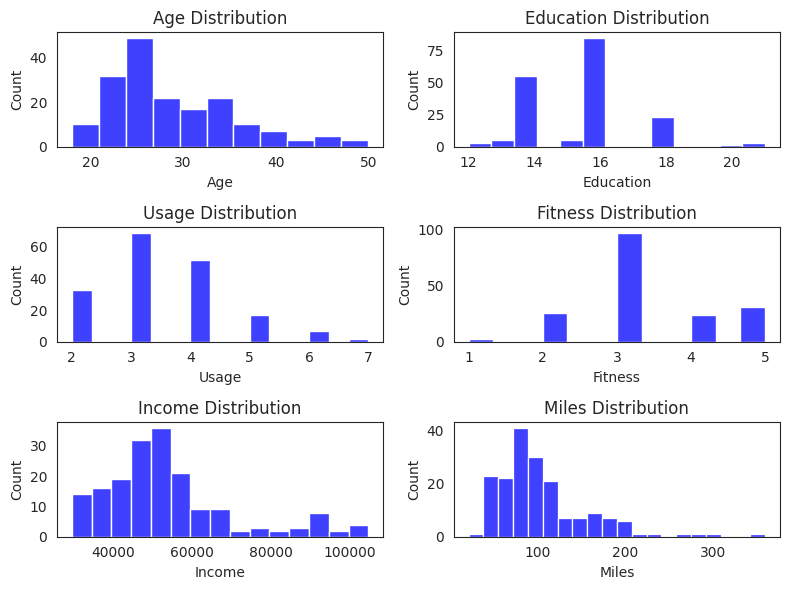

In [ ]:
# Create a subplot grid with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(8, 6))

# Plot Age distribution
sns.histplot(data=df, x="Age", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Age Distribution")

# Plot Education distribution
sns.histplot(data=df, x="Education", ax=axes[0, 1], color="blue")
axes[0, 1].set_title("Education Distribution")

# Plot Usage distribution
sns.histplot(data=df, x="Usage", ax=axes[1, 0], color="blue")
axes[1, 0].set_title("Usage Distribution")

# Plot Fitness distribution
sns.histplot(data=df, x="Fitness", ax=axes[1, 1], color="blue")
axes[1, 1].set_title("Fitness Distribution")

# Plot Income distribution
sns.histplot(data=df, x="Income", ax=axes[2, 0], color="blue")
axes[2, 0].set_title("Income Distribution")

# Plot Miles distribution
sns.histplot(data=df, x="Miles", ax=axes[2, 1], color="blue")
axes[2, 1].set_title("Miles Distribution")

plt.tight_layout()
plt.show()

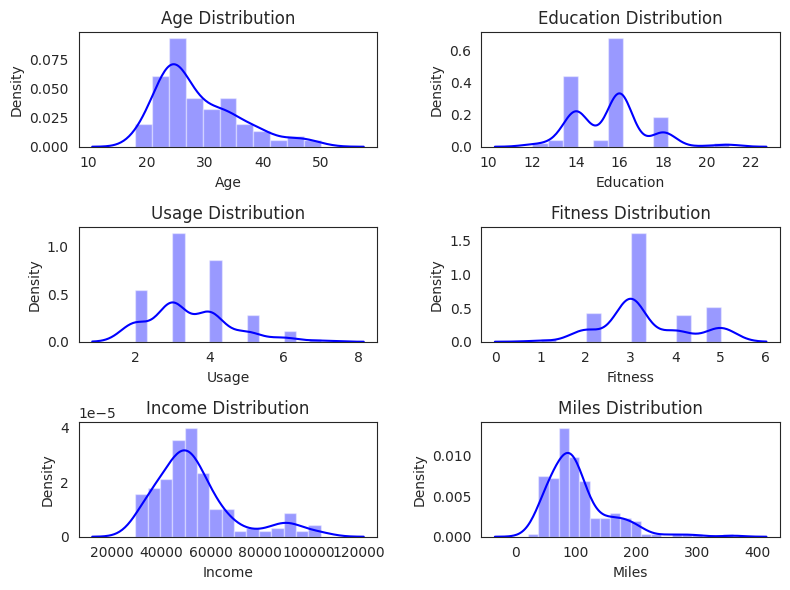

In [ ]:
# Create a subplot grid
fig, axes = plt.subplots(3, 2, figsize=(8, 6))

# Plot Age distribution
sns.distplot(df["Age"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Age Distribution")

# Plot Education distribution
sns.distplot(df["Education"], ax=axes[0, 1], color="blue")
axes[0, 1].set_title("Education Distribution")

# Plot Usage distribution
sns.distplot(df["Usage"], ax=axes[1, 0], color="blue")
axes[1, 0].set_title("Usage Distribution")

# Plot Fitness distribution
sns.distplot(df["Fitness"], ax=axes[1, 1], color="blue")
axes[1, 1].set_title("Fitness Distribution")

# Plot Income distribution
sns.distplot(df["Income"], ax=axes[2, 0], color="blue")
axes[2, 0].set_title("Income Distribution")

# Plot Miles distribution
sns.distplot(df["Miles"], ax=axes[2, 1], color="blue")
axes[2, 1].set_title("Miles Distribution")

plt.tight_layout()
plt.show()

#**Analysis:**
**Average Income Range:** The majority of product purchasers fall within the income bracket of 40,000 to 60,000 annually, indicating a significant customer segment within this income range.

**High Average Income Density:** The density of customers with an average income level exceeds 3.0, underscoring the concentration of individuals in this income category among product buyers.

**Fitness Rating Distribution:** Over 1.5 times the density of customers have rated their physical fitness as "Average," making it the most common fitness rating among purchasers.

**Preference for Excellent Shape:** The second-highest density of customers has chosen "Excellent" as their fitness rating, indicating a preference for high fitness levels among a substantial portion of the customer base.

**Income Brackets:** More than 35 customers earn an annual income between 50,000 and 55,000, with additional significant segments earning between 45,000 and 50,000, as well as 55,000 and 60,000.

**Education Levels:** The highest number of customers have an education level of 16, followed by the second-highest group with an education level of 14, while the fewest customers have an education level of 20.

**Usage Frequency:** The most prevalent usage pattern among customers is three days per week, while four days and two days per week follow as the second and third most common usage frequencies, respectively.

**Usage Extremes:** A relatively small number of customers use the product seven days per week, indicating that this level of usage is less common among purchasers.

**Fitness Ratings - Average Shape:** The majority of customers have provided an "Average" rating for their fitness level, indicating that this is the most commonly selected fitness rating.

**High Rating for Excellent Shape:** Approximately 40 customers have rated themselves as being in "Excellent" shape, suggesting a significant portion of the customer base is quite fit.

**Marital Status and Treadmill Purchases:** Married individuals are more inclined to purchase treadmills, indicating a higher likelihood of treadmill ownership among this demographic.

**Age Group Preferences:** The majority of treadmill purchases are made by individuals aged between 20 and 40 years, highlighting a strong preference for this age group when it comes to buying treadmills.

**Limited High Mileage Users:** Only a small portion of our customers engage in running activities exceeding 200 miles per week, suggesting that the majority of treadmill users have lower weekly mileage goals.

**Right-Skewed Distributions for Miles and Income:** Both the "Miles" and "Income" variables exhibit right-skewed distributions, signifying that the bulk of the data for these variables is concentrated on the lower end of the spectrum. In other words, most customers tend to run fewer miles per week and have lower incomes.

**Box plots and Outlier Detection**

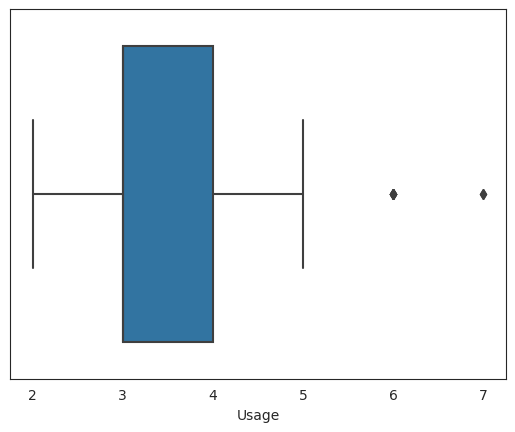

In [ ]:
# Usage Analysis - Box plot
sns.boxplot(data=df,x='Usage')
plt.show()

* 3 to 4 days is the most preferred usage days for customers
* 6 and 7 days per week is roughly the usage days for few customers (Outliers)

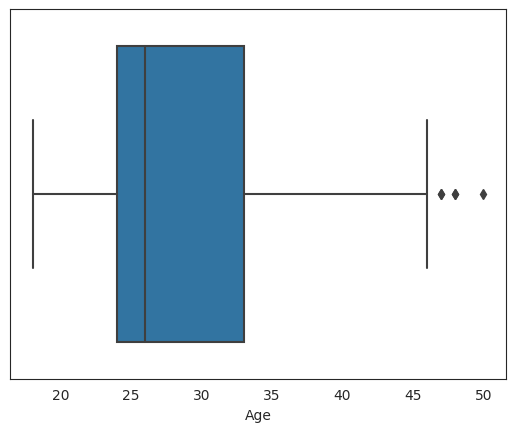

In [ ]:
# Age Analysis - Box plot
sns.boxplot(data=df,x='Age')
plt.show()

The most frequent age group among customers who have bought the product falls within the range of 23 to 34 years old. In contrast, there are notably fewer customers aged above 45 years when compared to the younger age group mentioned in the dataset.

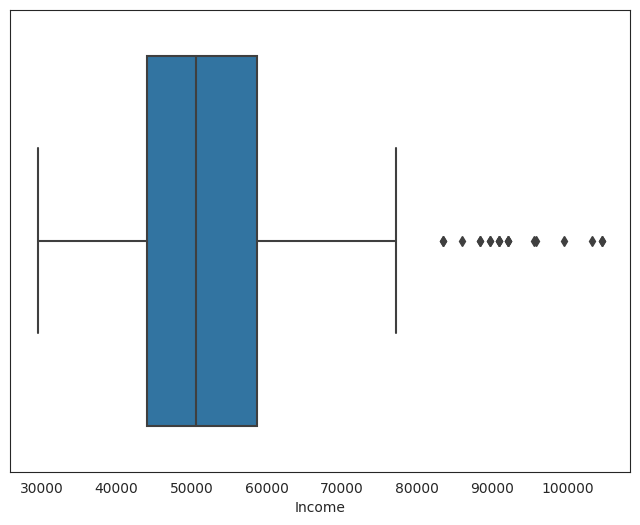

In [ ]:
# Income Analysis - Box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='Income')
plt.show()

A small number of customers have incomes exceeding 80,000 per year, indicating the presence of outliers in the income distribution. However, the majority of customers fall within the income range of approximately 45,000 to 60,000 per annum.

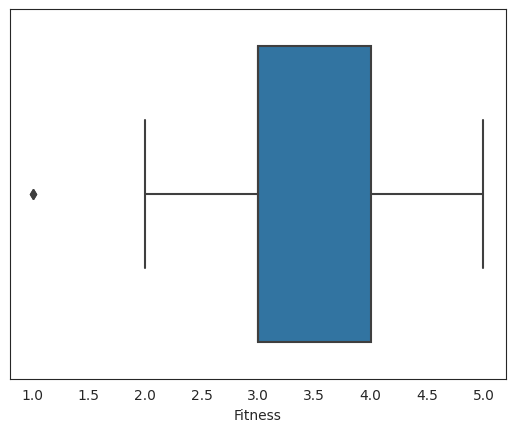

In [ ]:
# Fitness Rating Analysis - Box plot
sns.boxplot(data=df,x='Fitness')
plt.show()


A couple of customers have provided a fitness rating of 1, indicating poor physical shape, while the majority of customers have given fitness ratings within the range of 3.0 to 4.0.

**Bivariate Analysis**

Checking if features - Gender or MaritalStatus have any effect on the product purchased.

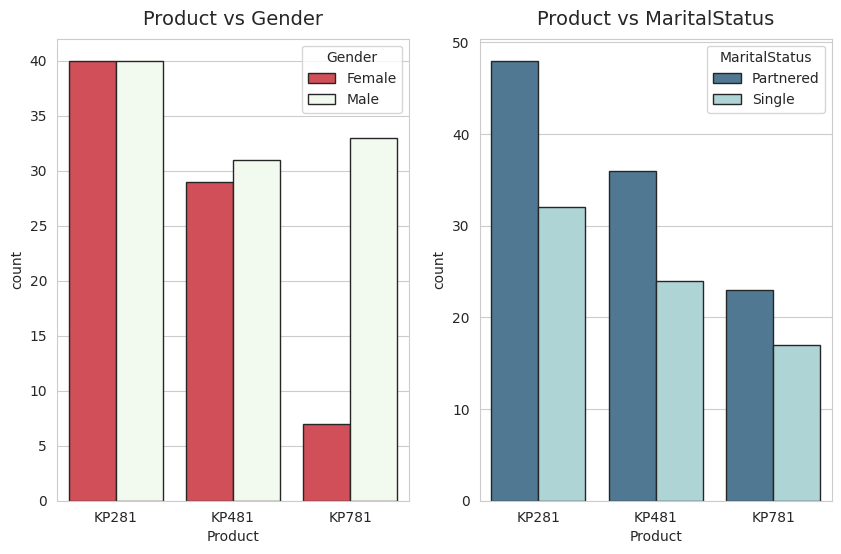

In [ ]:
# Set the seaborn style to 'whitegrid'
sns.set_style(style='whitegrid')

# Create a subplot with 1 row and 2 columns, setting the figure size
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot a countplot for 'Product' vs 'Gender' in the first subplot
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette=['#E63946', '#F1FAEE'], ax=axs[0])

# Plot a countplot for 'Product' vs 'MaritalStatus' in the second subplot
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette=['#457B9D', '#A8DADC', '#1D3557'], ax=axs[1])

axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)

plt.show()

#**Analysis:**
**Product vs Gender:**

* An approximately equal number of both males and females have chosen the KP281 and KP481 products.
* A noteworthy portion of male customers has shown a preference for the KP781 product.

**Product vs MaritalStatus:**

* Customers who are in a partnered or marital status display a stronger tendency to purchase the product.


**Investigating whether the subsequent attributes influence the choice of product purchase:**
* Age
* Education
* Usage
*Fitness
*Income
* Miles

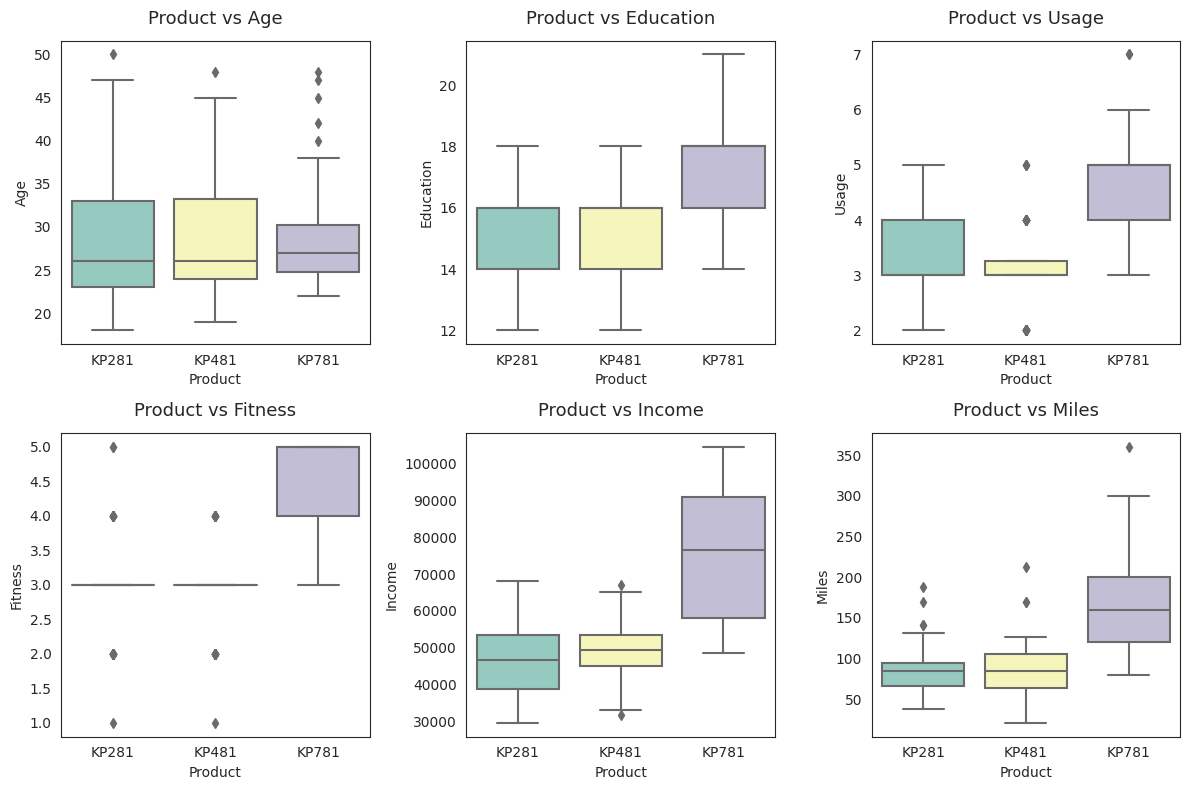

In [ ]:
# Define the attributes of interest
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Set the seaborn style to "white"
sns.set_style("white")

# Create a subplot grid with 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # Smaller figsize

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Initialize a counter
count = 0

# Loop through the rows and columns of the subplot grid
for i in range(2):
    for j in range(3):
        # Create a box plot for each attribute vs. 'Product'
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')

        # Set titles for each subplot
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)

        # Increment the counter
        count += 1

# Adjust the figure layout
fig.tight_layout()

plt.show()

# **Analysis:**
**Product vs Age:**

* Customers who buy products KP281 and KP481 exhibit a similar median age.
* The likelihood of purchasing the KP781 product is higher for customers aged between 25 and 30.

**Product vs Education:**

* Customers with an education level exceeding 16 have a greater probability of purchasing the KP781 product.
* Customers with an education level less than 16 have roughly equal chances of purchasing either KP281 or KP481.

**Product vs Usage:**

* Customers planning to use the treadmill more than four times a week are more inclined to purchase the KP781 product.
* Other customers are more likely to purchase KP281 or KP481.

**Product vs Fitness:**

* Customers with a fitness level of 3 or higher are more likely to purchase the KP781 product.

**Product vs Income:**

* Customers with an income exceeding $60,000 are more likely to purchase the KP781 product.

**Product vs Miles:**

* Customers expecting to walk/run more than 120 miles per week are more likely to choose the KP781 product.

**For correlation: Heatmaps, Pairplots**

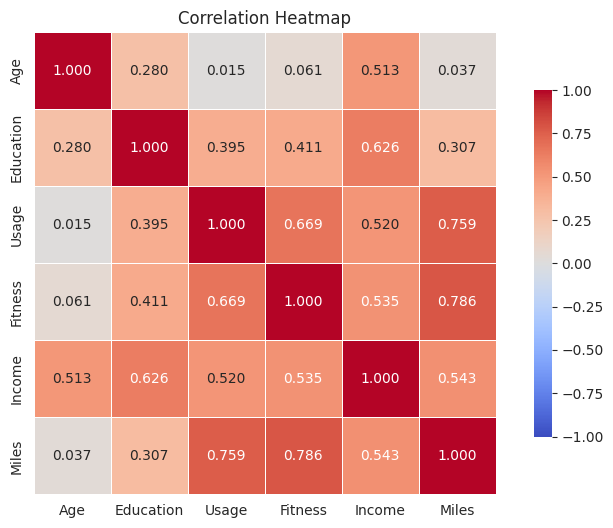

In [ ]:
# Set the color map for the heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap with improved aesthetics
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".3f", cmap=cmap,
            linewidths=0.5, vmin=-1, vmax=1, square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation Heatmap")

plt.show()

#**Analysis:**
**Strong Associations:**

* There are notable strong positive correlations between 'Miles' and both 'Fitness' and 'Usage.' This suggests that customers with higher fitness levels tend to use treadmills more frequently and cover greater distances.

* A strong positive correlation exists between 'Income' and 'Education.' This implies that individuals with higher incomes tend to have higher levels of education, a relationship supported by the earlier bivariate analysis of categorical variables that revealed a preference for high-end models (KP781) among this group.
Age as Not a Barrier:

* Notably, there is no significant correlation between 'Usage' and 'Age,' as well as 'Fitness' and 'Age.' These findings indicate that age should not be considered a barrier to treadmill usage or a determinant of specific treadmill model preferences.

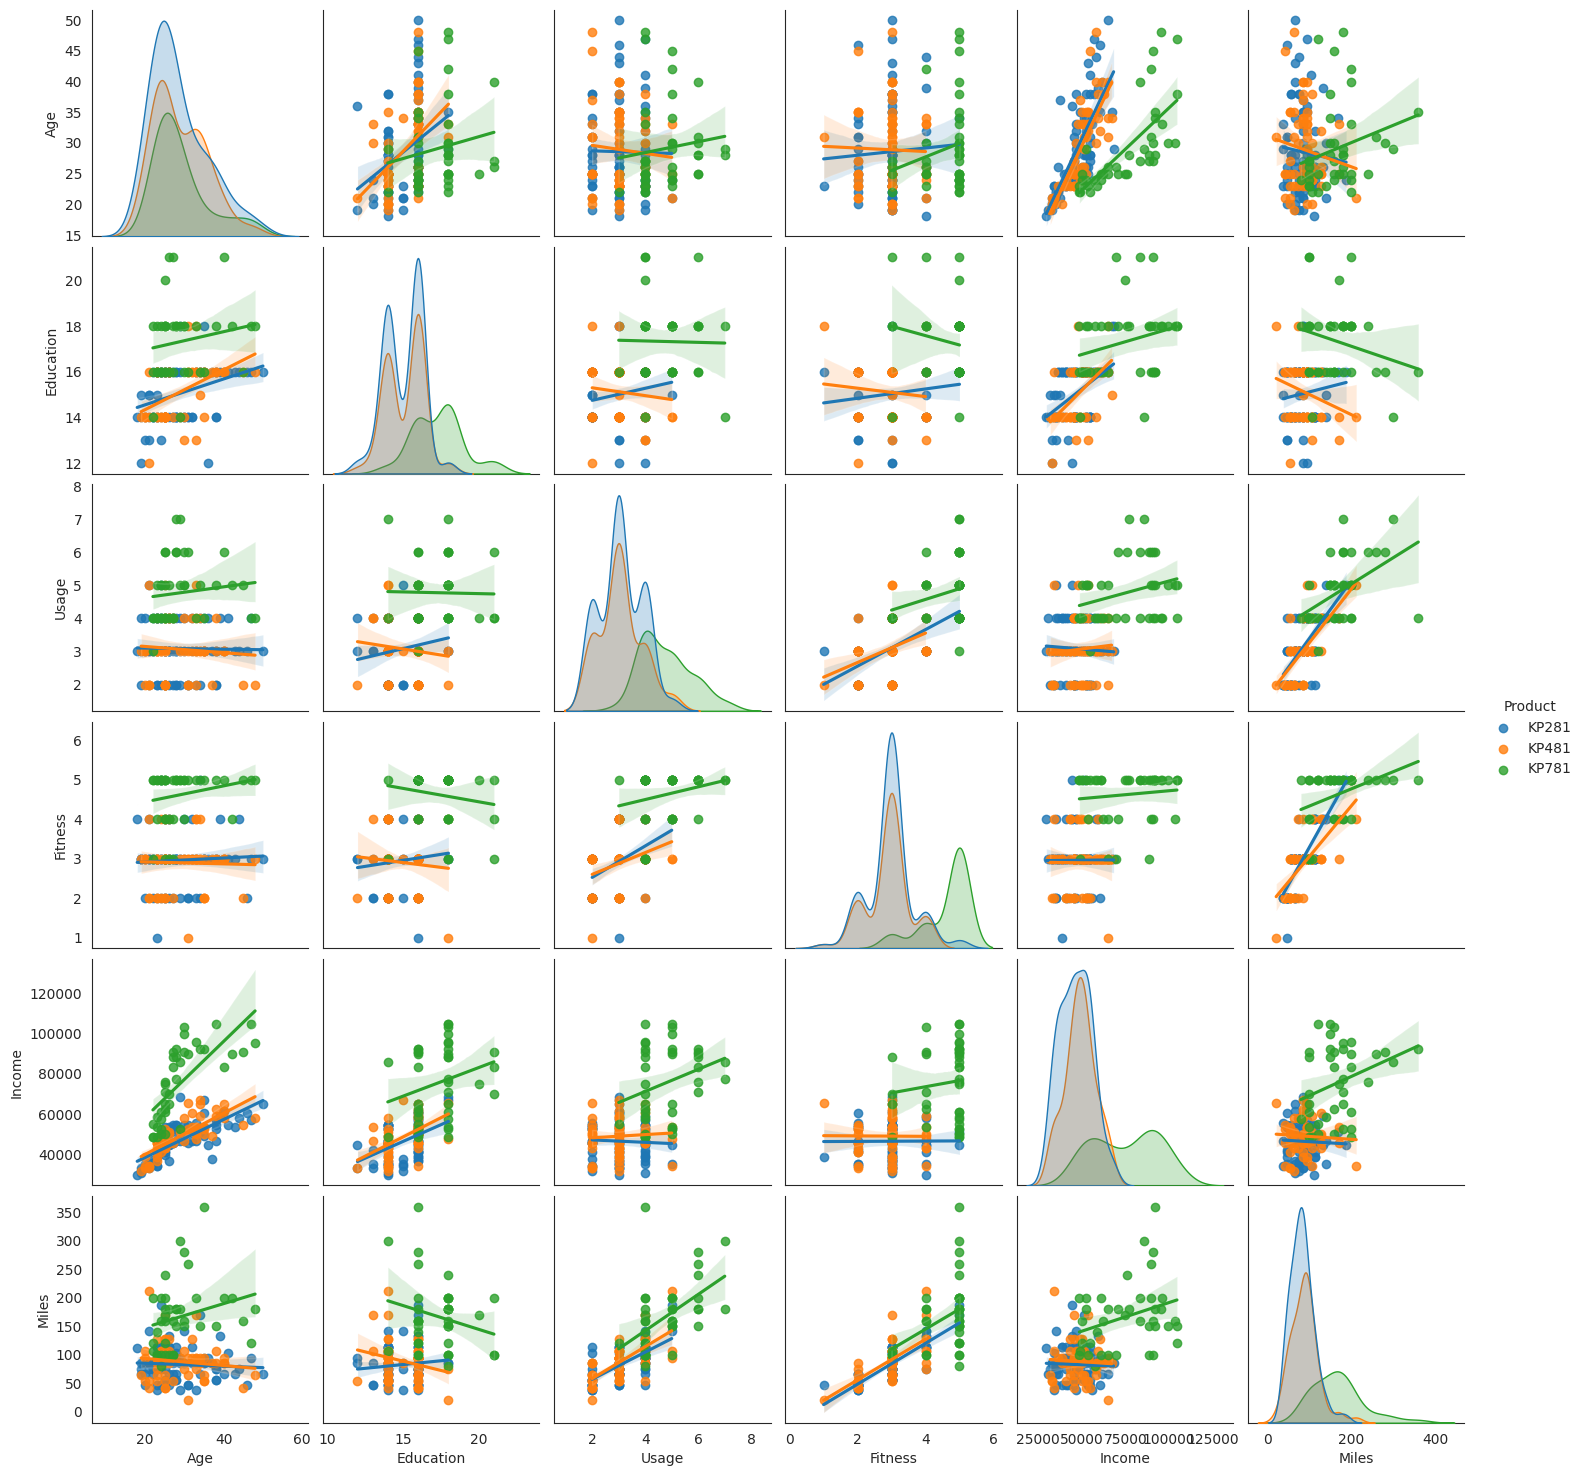

In [ ]:
# Product Analysis - Pair Plot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

In the pair plot shown above, the correlations between products and various attributes align with our earlier observations.

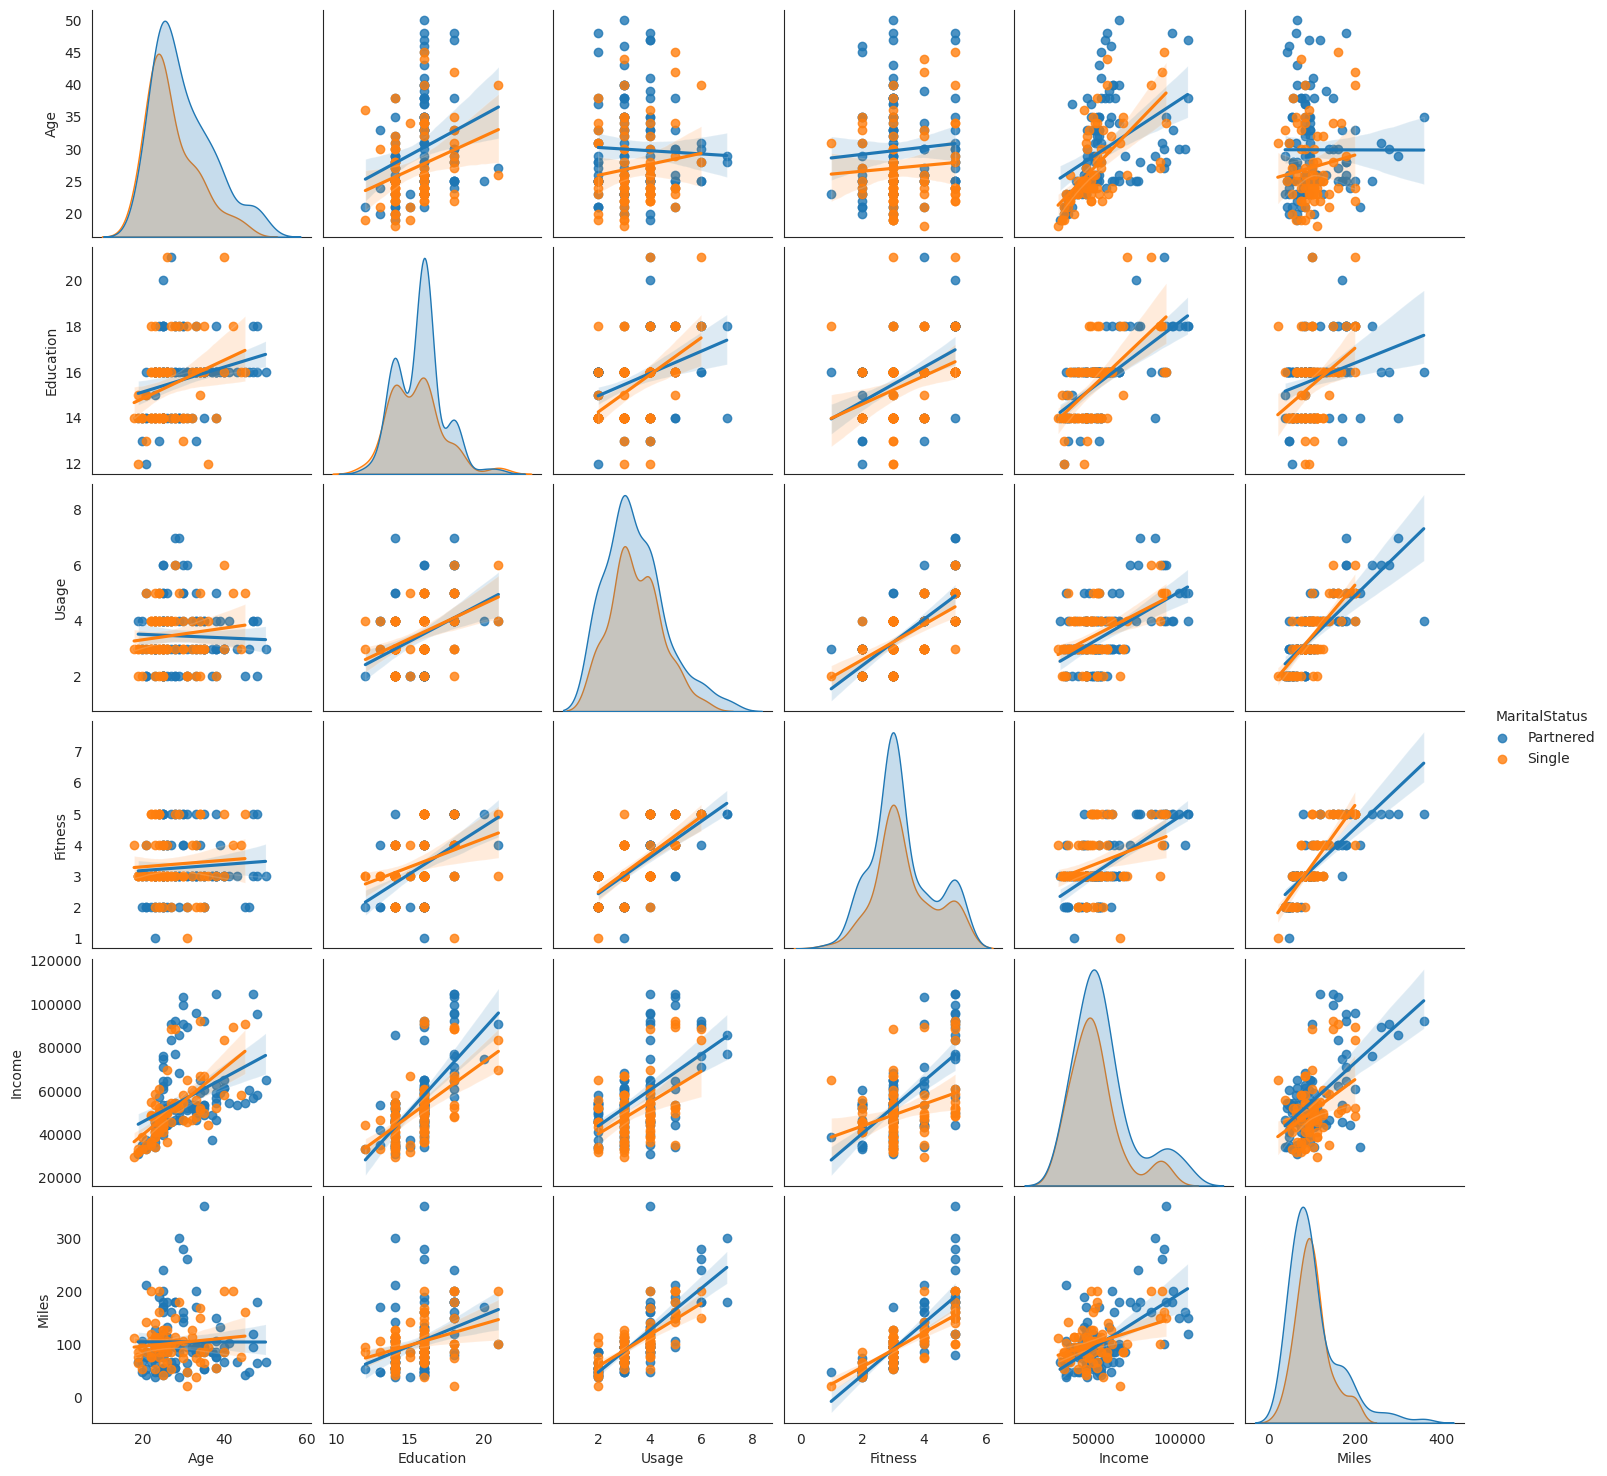

In [ ]:
# Marital Status - pair plot
sns.pairplot(df,hue='MaritalStatus',kind='reg')
plt.show()


In the pair plot above, the correlations with other attributes are centered around the marital status of the customers.

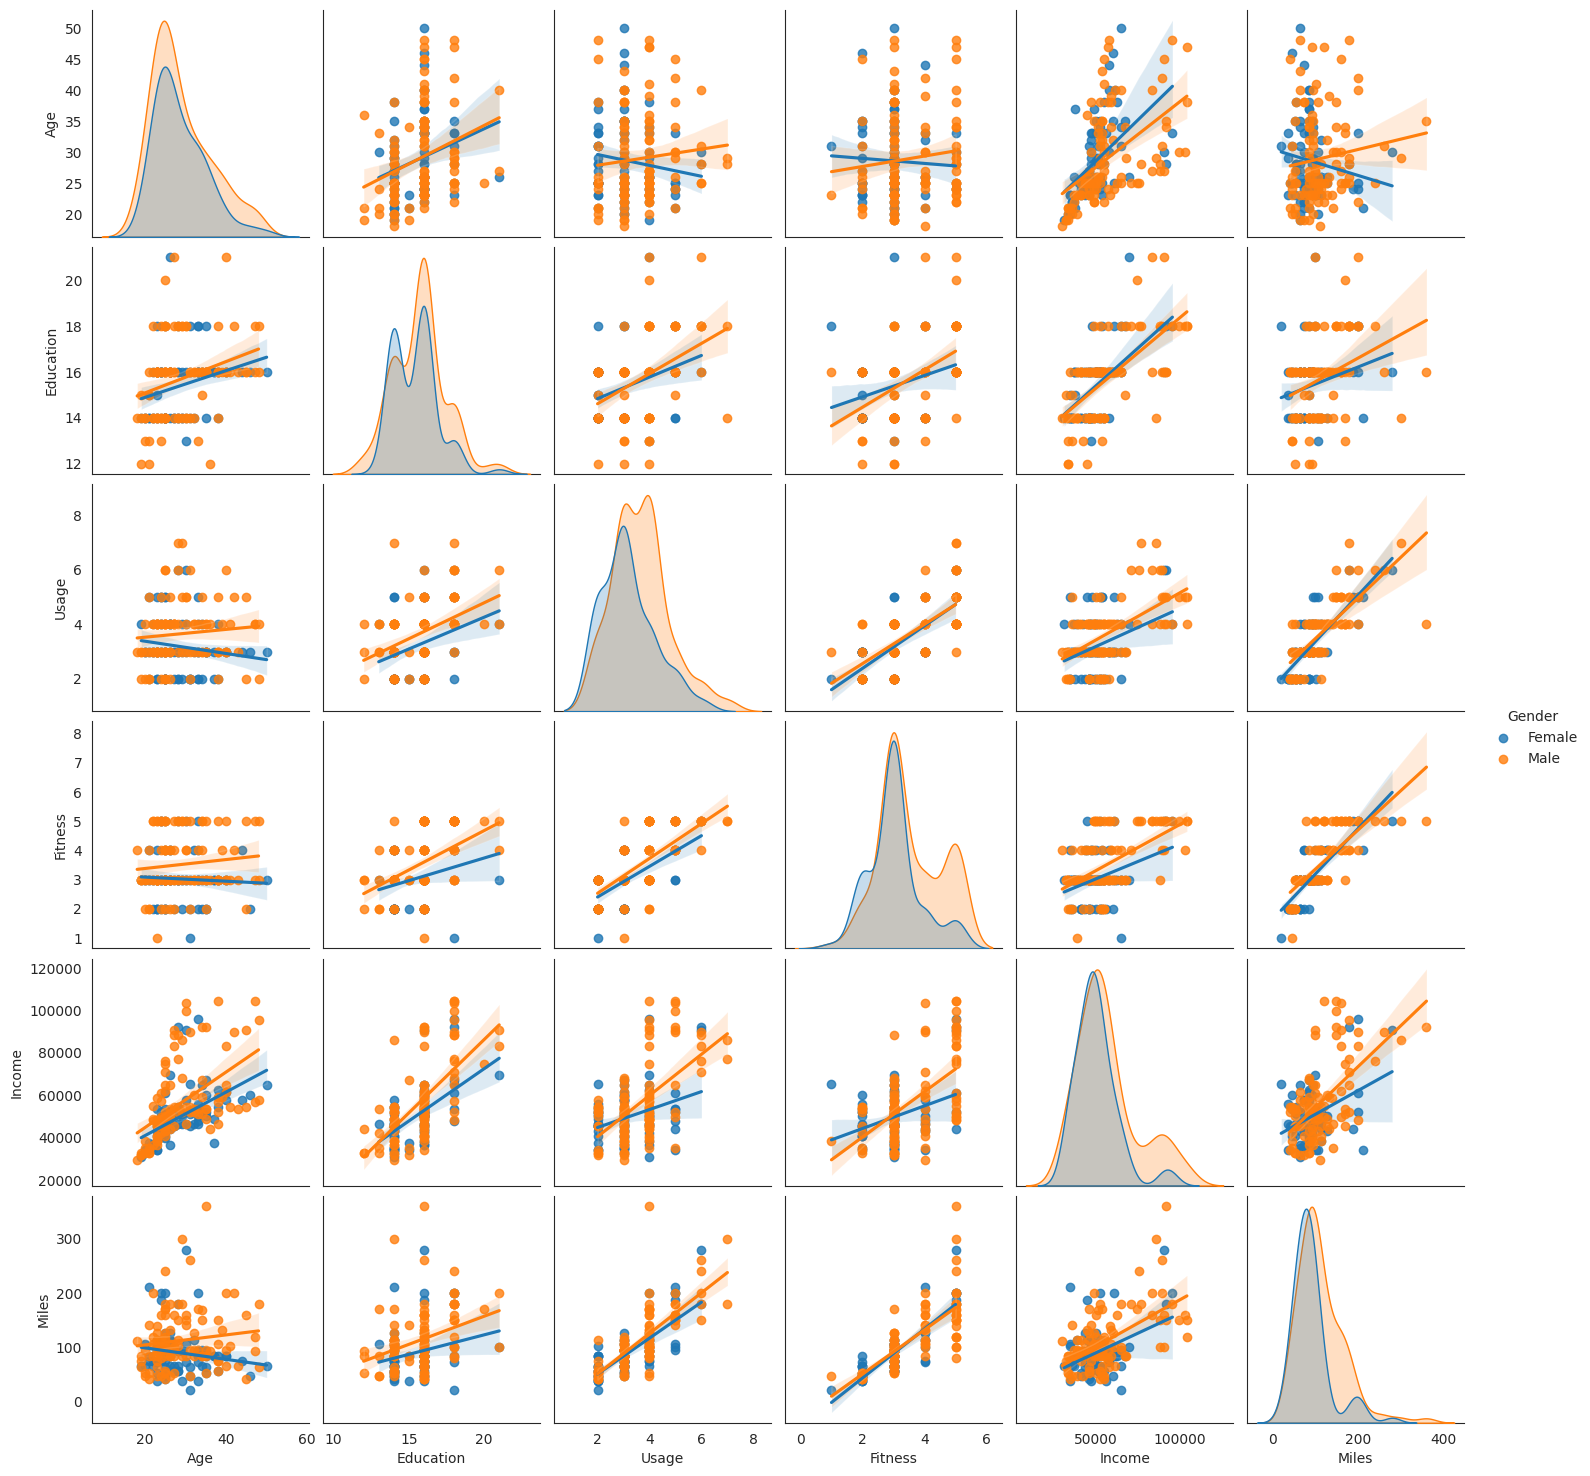

In [ ]:
# Gender Analysis - Pair Plot
sns.pairplot(df,hue='Gender',kind='reg')
plt.show()


In this pair plot, the observed correlations mirror those previously shown in the heatmap mentioned earlier.

**Missing Values**

In [ ]:
df.isna().sum().sum()

0

No missing values found.

**Removing outliers for Income Feature**

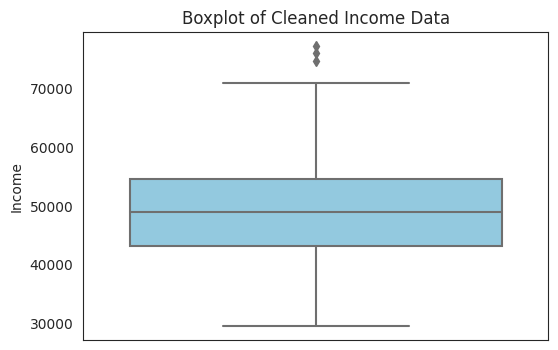

In [ ]:
# Create a copy of the DataFrame
df_cleaned = df.copy()

# Outlier Treatment for the 'Income' Feature
# Remove outliers by excluding the top 5% and bottom 1% of the values
Q3 = df_cleaned['Income'].quantile(0.75)
Q1 = df_cleaned['Income'].quantile(0.25)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers in the 'Income' column
df_cleaned = df_cleaned[(df_cleaned['Income'] > lower_bound) & (df_cleaned['Income'] < upper_bound)]

# Create a boxplot for the 'Income' column in the cleaned DataFrame
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_cleaned, y='Income', color='skyblue')

plt.title('Boxplot of Cleaned Income Data')
plt.ylabel('Income')

plt.show()

**Removing outliers for the Mile Feature**

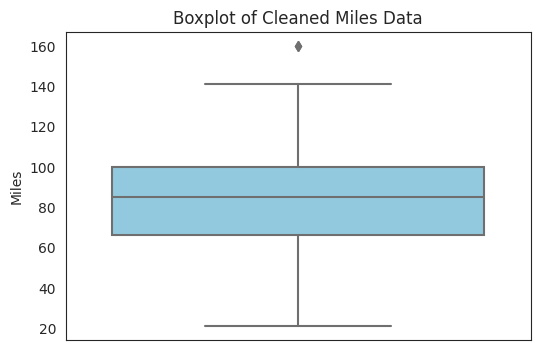

In [ ]:
# Calculate the third quartile (Q3) and first quartile (Q1) for the 'Miles' column in the cleaned DataFrame
Q3_miles = df_cleaned['Miles'].quantile(0.75)
Q1_miles = df_cleaned['Miles'].quantile(0.25)

# Calculate the Interquartile Range (IQR) for 'Miles'
IQR_miles = Q3_miles - Q1_miles

# Define the lower and upper bounds for identifying outliers in 'Miles'
lower_bound_miles = Q1_miles - 1.5 * IQR_miles
upper_bound_miles = Q3_miles + 1.5 * IQR_miles

# Filter the cleaned DataFrame to remove outliers in the 'Miles' column
df_cleaned = df_cleaned[(df_cleaned['Miles'] > lower_bound_miles) & (df_cleaned['Miles'] < upper_bound_miles)]

# Create a boxplot for the 'Miles' column in the cleaned DataFrame
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_cleaned, y='Miles', color='skyblue')

plt.title('Boxplot of Cleaned Miles Data')
plt.ylabel('Miles')

plt.show()

In [ ]:
df_cleaned.shape

(147, 9)

#**Probability- marginal, conditional probability**

**Marginal Probability**

In [ ]:
# Calculate and display probabilities for the 'Product' column
product_probs = df['Product'].value_counts(normalize=True)
print("Probability of buying each product:")
print(product_probs)

# Calculate and display probabilities for the 'Gender' column
gender_probs = df['Gender'].value_counts(normalize=True)
print("\nProbability of customer gender:")
print(gender_probs)

# Calculate and display probabilities for the 'MaritalStatus' column
marital_probs = df['MaritalStatus'].value_counts(normalize=True)
print("\nProbability of marital status:")
print(marital_probs)

Probability of buying each product:
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Probability of customer gender:
Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

Probability of marital status:
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64


#**Analysis:**
**Product Preferences:**

* The probabilities of purchasing different products are as follows:
KP281: 44%
KP481: 33%
KP781: 22%
* Customers are most likely to purchase KP281, followed by KP481 and KP781. This information can inform marketing and inventory decisions.

**Gender Distribution:**

* The probability of a customer being male is 57%, while the probability of a customer being female is 42%.
* There is a higher probability of customers being male compared to female. Understanding gender distribution can help tailor marketing strategies.

**Marital Status Breakdown:**

* The probability of a customer being married or partnered is 59%, while the probability of a customer being single is 40%.
* A significant portion of customers are in a partnered or married status. This insight may influence product recommendations and promotions.







#**Conditional Probabilities**

**Probability of each product given gender**

In [ ]:
def calculate_product_probabilities_given_gender(gender):
    # Check for valid gender values
    if gender not in ['Male', 'Female']:
        return "Invalid gender value."

    # Create a cross-tabulation of Gender and Product
    gender_product_cross = pd.crosstab(index=df['Gender'], columns=df['Product'])

    # Calculate conditional probabilities for each product given the gender
    total_gender_count = gender_product_cross.loc[gender].sum()
    p_KP781_given_gender = gender_product_cross['KP781'][gender] / total_gender_count
    p_KP481_given_gender = gender_product_cross['KP481'][gender] / total_gender_count
    p_KP281_given_gender = gender_product_cross['KP281'][gender] / total_gender_count

    # Print marginal probabilities if specified
    if gender == 'Male':
        print(f"P(Male): {gender_product_cross.loc['Male'].sum() / len(df):.2f}")
        print(f"P(Female): {gender_product_cross.loc['Female'].sum() / len(df):.2f}\n")

    # Print conditional probabilities for each product given the gender
    print(f"P(KP781/{gender}): {p_KP781_given_gender:.2f}")
    print(f"P(KP481/{gender}): {p_KP481_given_gender:.2f}")
    print(f"P(KP281/{gender}): {p_KP281_given_gender:.2f}\n")

calculate_product_probabilities_given_gender('Male')
calculate_product_probabilities_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



##**Analysis:**
**Gender Distribution:**

Among the customers in the dataset, approximately 58% are Male, while around 42% are Female. This suggests that the dataset has a slightly higher representation of Male customers.
###**Product Preferences by Gender:**

**Male Customers:**

* Among Male customers, product preferences are as follows:
KP781: 32%
KP481: 30%
KP281: 38%
* Male customers show a relatively balanced preference for KP781 and KP481, with a slightly higher preference for KP281.

**Female Customers:**

* Among Female customers, product preferences are as follows:

   * KP781: 9%

   * KP481: 38%

   * KP281: 53%

* Female customers demonstrate a significant preference for KP281, followed by KP481, while KP781 has the lowest preference.

**Key Takeaways:**

* Male customers make up the majority of the dataset.
* Male customers are more evenly distributed in their preferences across the three products, with a slightly higher preference for KP281.
*Female customers, on the other hand, have a strong preference for KP281, making it their preferred choice by a significant margin.

**Probability of each product given MaritalStatus**

In [ ]:
def calculate_product_probabilities_given_marital_status(status):
    # Check for valid marital status values
    if status not in ['Single', 'Partnered']:
        return "Invalid marital status value."

    # Create a cross-tabulation of MaritalStatus and Product
    marital_status_product_cross = pd.crosstab(index=df['MaritalStatus'], columns=df['Product'])

    # Calculate conditional probabilities for each product given the marital status
    total_status_count = marital_status_product_cross.loc[status].sum()
    p_KP781_given_status = marital_status_product_cross['KP781'][status] / total_status_count
    p_KP481_given_status = marital_status_product_cross['KP481'][status] / total_status_count
    p_KP281_given_status = marital_status_product_cross['KP281'][status] / total_status_count

    # Print marginal probabilities if specified
    if status == 'Single':
        print(f"P(Single): {marital_status_product_cross.loc['Single'].sum() / len(df):.2f}")
        print(f"P(Partnered): {marital_status_product_cross.loc['Partnered'].sum() / len(df):.2f}\n")

    # Print conditional probabilities for each product given the marital status
    print(f"P(KP781/{status}): {p_KP781_given_status:.2f}")
    print(f"P(KP481/{status}): {p_KP481_given_status:.2f}")
    print(f"P(KP281/{status}): {p_KP281_given_status:.2f}\n")

calculate_product_probabilities_given_marital_status('Single')
calculate_product_probabilities_given_marital_status('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



#**Analysis:**
**Marital Status Distribution:**

* Among the customers in the dataset:

   * Approximately 41% are Single.
   *  Around 59% are Partnered (Married or in a Partnership).

**Product Preferences by Marital Status:**

* **Single Customers:**

  * Among Single customers, product preferences are as follows:

   KP781: 23%

   KP481: 33%

   KP281: 44%
  * Single customers demonstrate a preference for KP281, followed by KP481, with KP781 having the lowest preference.

**Partnered Customers:**

* Among Partnered customers, product preferences are as follows:

   **KP781: 21%, KP481: 34%, KP281: 45%**
* Partnered customers also show a preference for KP281, followed by KP481, with KP781 having a lower preference compared to the other two products.

**Key Takeaways:**

* Partnered customers make up a larger portion of the dataset.
* Both Single and Partnered customers have a preference for KP281, with Partnered customers showing a slightly higher preference.
*KP481 is the second most preferred product for both groups, while KP781 has the lowest preference.

**Customer Age Group Analysis**

In [ ]:
df_with_fitness_categories['age_group'] = df_with_fitness_categories.Age
df_with_fitness_categories.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below Average,20


In [ ]:
# Define the age group bins and labels
age_bins = [0, 21, 35, 45, 60]
age_labels = ['Teen', 'Adult', 'Middle Aged', 'Elder']

# Create a new column 'age_group' based on the 'Age' column
df_with_fitness_categories['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

df_with_fitness_categories.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below Average,Teen


In [ ]:
df_with_fitness_categories['age_group'].value_counts()

Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: age_group, dtype: int64

In [ ]:
df_with_fitness_categories[df_with_fitness_categories.Product=='KP281']["age_group"].value_counts()

Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: age_group, dtype: int64

In [ ]:
df_with_fitness_categories[df_with_fitness_categories.Product=='KP481']["age_group"].value_counts()

Adult          45
Teen            7
Middle Aged     7
Elder           1
Name: age_group, dtype: int64

In [ ]:
df_with_fitness_categories[df_with_fitness_categories.Product=='KP781']["age_group"].value_counts()

Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: age_group, dtype: int64

In [ ]:
# Create a cross-tabulation of Product and age_group with margins
cross_tab = pd.crosstab(index=df_with_fitness_categories['Product'], columns=df_with_fitness_categories['age_group'], margins=True, margins_name='Total')

# Calculate conditional probabilities
conditional_probs = (cross_tab / cross_tab.loc['Total']).round(2)

# Calculate marginal probabilities
marginal_probs = (cross_tab / cross_tab['Total']['Total']).round(2)

print("Cross-Tabulation of Product and Age Group with Margins:")
print(cross_tab)
print("\nConditional Probabilities:")
print(conditional_probs)
print("\nMarginal Probabilities:")
print(marginal_probs)

Cross-Tabulation of Product and Age Group with Margins:
age_group  Teen  Adult  Middle Aged  Elder  Total
Product                                          
KP281        10     56           11      3     80
KP481         7     45            7      1     60
KP781         0     34            4      2     40
Total        17    135           22      6    180

Conditional Probabilities:
age_group  Teen  Adult  Middle Aged  Elder  Total
Product                                          
KP281      0.59   0.41         0.50   0.50   0.44
KP481      0.41   0.33         0.32   0.17   0.33
KP781      0.00   0.25         0.18   0.33   0.22
Total      1.00   1.00         1.00   1.00   1.00

Marginal Probabilities:
age_group  Teen  Adult  Middle Aged  Elder  Total
Product                                          
KP281      0.06   0.31         0.06   0.02   0.44
KP481      0.04   0.25         0.04   0.01   0.33
KP781      0.00   0.19         0.02   0.01   0.22
Total      0.09   0.75         0.12   0.0

**Cross-Tabulation of Product and Age Group with Margins:**

* The cross-tabulation table shows the distribution of customers across different age groups (Teen, Adult, Middle Aged, Elder) and their corresponding purchases of three products (KP281, KP481, KP781).

* In the "Teen" age group, most customers purchased KP281 (10 out of 17), followed by KP481 (7 out of 17). No customers in this group purchased KP781.

* In the "Adult" age group, the majority purchased KP281 (56 out of 135), followed by KP481 (45 out of 135), and KP781 (34 out of 135).

* In the "Middle Aged" group, customers mostly purchased KP281 (11 out of 22), followed by KP481 (7 out of 22), and KP781 (4 out of 22).

* In the "Elder" age group, some customers purchased KP281 (3 out of 6), KP481 (1 out of 6), and KP781 (2 out of 6).

**Conditional Probabilities:**

* Conditional probabilities represent the likelihood of purchasing a specific product within each age group.

* For the "Teen" age group, there is a 59% probability of purchasing KP281, a 41% probability of purchasing KP481, and no probability of purchasing KP781.

* In the "Adult" age group, there is a 41% probability of purchasing KP281, a 33% probability of purchasing KP481, and a 25% probability of purchasing KP781.

* For the "Middle Aged" group, there is a 50% probability of purchasing KP281, a 32% probability of purchasing KP481, and an 18% probability of purchasing KP781.

* In the "Elder" age group, there is a 50% probability of purchasing KP281, a 17% probability of purchasing KP481, and a 33% probability of purchasing KP781.

**Marginal Probabilities:**

* Marginal probabilities represent the likelihood of being in a specific age group given the product choice.

* Among customers who purchased KP281, 6% are in the "Teen" age group, 31% are "Adult," 6% are "Middle Aged," and 2% are "Elder."

* For KP481 customers, 4% are "Teen," 25% are "Adult," 4% are "Middle Aged," and 1% are "Elder."

* Among KP781 customers, none are "Teen," 19% are "Adult," 2% are "Middle Aged," and 1% are "Elder."

**Observations:**

* The "Teen" age group shows a preference for KP281, while the "Adult" age group has the highest number of customers across all products.

* KP781 has fewer customers in the "Teen" and "Elder" age groups.

* In terms of conditional probabilities, age seems to have an impact on product choice, with different age groups showing varying preferences for the three products.

In [ ]:
df_with_fitness_categories

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below Average,Teen
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape,Middle Aged
176,KP781,42,Male,18,Single,5,4,89641,200,Good Shape,Middle Aged
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape,Middle Aged
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent Shape,Elder


In [ ]:
# Create a cross-tabulation of Product and Fitness_Category with margins
cross_tab_fitness = pd.crosstab(index=df_with_fitness_categories['Product'], columns=df_with_fitness_categories['Fitness_Category'], margins=True, margins_name='Total')

# Calculate conditional probabilities for Fitness_Category
conditional_probs_fitness = (cross_tab_fitness / cross_tab_fitness.loc['Total']).round(2)

# Calculate marginal probabilities for Fitness_Category
marginal_probs_fitness = (cross_tab_fitness / cross_tab_fitness['Total']['Total']).round(2)

print("Cross-Tabulation of Product and Fitness_Category with Margins:")
print(cross_tab_fitness.to_string())

print("\nConditional Probabilities for Fitness_Category:")
print(conditional_probs_fitness.to_string())

print("\nMarginal Probabilities for Fitness_Category:")
print(marginal_probs_fitness.to_string())


Cross-Tabulation of Product and Fitness_Category with Margins:
Fitness_Category  Average Shape  Below Average  Excellent Shape  Good Shape  Poor Shape  Total
Product                                                                                       
KP281                        54             14                2           9           1     80
KP481                        39             12                0           8           1     60
KP781                         4              0               29           7           0     40
Total                        97             26               31          24           2    180

Conditional Probabilities for Fitness_Category:
Fitness_Category  Average Shape  Below Average  Excellent Shape  Good Shape  Poor Shape  Total
Product                                                                                       
KP281                      0.56           0.54             0.06        0.38         0.5   0.44
KP481                      0.40  

**Cross-Tabulation of Product and Fitness_Category with Margins:**

* For KP281, the highest count of customers falls into the "Average Shape" category, followed by "Good Shape."
* KP481 has the most customers in the "Average Shape" category, followed by "Below Average" and "Good Shape."
* KP781 predominantly attracts customers in "Excellent Shape," with almost none in "Below Average."

**Conditional Probabilities for Fitness_Category:**

* For KP281, approximately 56% of customers with "Average Shape" purchase this product. For "Good Shape," it's around 38%, and for "Poor Shape," it's 50%.
* KP481 sees approximately 46% of its customers with "Below Average" fitness and 40% with "Average Shape" buying the product.
* KP781 attracts nearly 94% of customers in "Excellent Shape."

**Marginal Probabilities for Fitness_Category:**

* Overall, among all customers, around 30% fall into the "Average Shape" category, while about 8% are in "Below Average" fitness.
* For KP281, approximately 30% are in "Average Shape," 8% in "Below Average," and 5% in "Good Shape."
* KP481 has about 22% in "Average Shape," 7% in "Below Average," and 4% in "Good Shape."
* KP781 sees only about 2% in "Average Shape" and 16% in "Excellent Shape" among all customers.

In [ ]:
# Create a cross-tabulation of Product, Gender, and Fitness_Category with margins and normalize it
cross_tab_gender_fitness = pd.crosstab(index=[df_with_fitness_categories['Product'], df_with_fitness_categories['Gender']],
                                       columns=df_with_fitness_categories['Fitness_Category'],
                                       normalize='index', margins=True, margins_name='Total')

cross_tab_gender_fitness = cross_tab_gender_fitness.round(2)

print("Normalized Cross-Tabulation of Product, Gender, and Fitness_Category with Margins:")
print(cross_tab_gender_fitness.to_string())

Normalized Cross-Tabulation of Product, Gender, and Fitness_Category with Margins:
Fitness_Category  Average Shape  Below Average  Excellent Shape  Good Shape  Poor Shape
Product Gender                                                                         
KP281   Female             0.65           0.25             0.02        0.08        0.00
        Male               0.70           0.10             0.02        0.15        0.02
KP481   Female             0.62           0.21             0.00        0.14        0.03
        Male               0.68           0.19             0.00        0.13        0.00
KP781   Female             0.14           0.00             0.71        0.14        0.00
        Male               0.09           0.00             0.73        0.18        0.00
Total                      0.54           0.14             0.17        0.13        0.01


#**Analysis:**
**Product Preferences:** Both genders prefer "Average Shape" fitness, but with respect to Good Shape males show a slightly higher preference .

**Gender Differences:** Females tend to choose "Below Average" fitness more than males, while males opt for "Good Shape" more in the KP281 category.

**KP781 Stands Out:** KP781 attracts more customers in the "Excellent Shape" category, suggesting a focus on fitness-conscious individuals.

**Overall Distribution:** "Average Shape" dominates across all products and genders.

**Limited "Poor Shape" Customers:** Few customers fall into the "Poor Shape" category, indicating a generally healthier customer base.

#**Customer Profiling for Each Product:**

###**KP281:**

**Typical Customer:** Males and females of various ages, primarily adults.
Fitness Preference: "Average Shape."

**Income Range:** Diverse income levels, with a preference for mid-range.

**Usage Pattern:** Moderate usage, 3-4 times a week.

**Recommendation:** Focus marketing efforts on the "Average Shape" category, emphasizing the product's versatility and suitability for both genders and various age groups. Consider bundling options with fitness accessories to encourage more frequent usage.

###**KP481:**

**Typical Customer:** Both genders, adults, and middle-aged individuals.
Fitness Preference: "Average Shape" and "Below Average."

**Income Range:** Moderate income levels.

**Usage Pattern:** Regular usage, 3-4 times a week.

**Recommendation:** Highlight the product's appeal to both genders and its suitability for customers seeking a range of fitness levels, including "Average Shape" and "Below Average." Offer promotions that target couples or partners, as they form a significant customer base.

###**KP781:**

**Typical Customer:** Primarily males, especially those in "Excellent Shape."
Fitness Preference: "Excellent Shape."

**Income Range:** Higher income levels.

**Usage Pattern:** More frequent usage, 4-5 times a week.

**Recommendation:** Leverage the product's popularity among males and fitness-conscious individuals. Run marketing campaigns emphasizing advanced features and fitness benefits. Consider loyalty programs or bundles with fitness services for this niche customer segment.

#**Recommendations:**
###**Product Strategy:**

**KP281 Promotion:** Continue promoting KP281 as it is the most popular product among customers. Consider offering package deals or discounts to incentivize purchases.

**KP481 Targeting:** Focus on marketing KP481 to budget-conscious customers, as it appears to be the second most preferred product. Highlight its cost-effectiveness and value for money.

**KP781 for Fitness Enthusiasts:** Position KP781 as the premium choice for fitness enthusiasts and professionals. Emphasize its advanced features and capabilities.

###**Gender-Specific Marketing:**

* Develop targeted marketing campaigns to encourage more female customers to purchase exercise equipment. Address their specific fitness needs and concerns.

###**Income-Based Segmentation:**

* For customers with an annual income in the range of 39,000 to 53,000 dollars, promote KP281 and KP481 as budget-friendly options.
* For customers with higher incomes (above 60,000 dollars), focus on promoting KP781, highlighting its advanced features and durability.

###**Fitness Awareness:**

* Leverage the strong preference for "Average Shape" fitness by offering workout plans, guidance, and fitness tips to help customers achieve their fitness goals.
Targeted Age Group:

* Consider expanding marketing efforts to target customers above 40 years of age, highlighting the health benefits of regular exercise and the suitability of treadmills for maintaining an active lifestyle as one ages.

###**Customer Support and Upgrades:**

* Provide excellent customer support, including guidance on product usage, maintenance, and troubleshooting.
* Recommend users to upgrade from lower-end models to higher-end versions based on their consistent usage and fitness goals.

###**Influencer Marketing:**

* Collaborate with fitness influencers and international athletes to promote KP781. Their endorsements can significantly impact the buying decisions of fitness-conscious customers.

###**Market Research:**

* Conduct market research to explore opportunities for expanding the market beyond 50 years of age. Identify the unique health benefits and features that would appeal to this demographic.